##### KATOGORİK VERİLERİN SINIFLANDIRILMASI VE KARMAŞIKLIK MATRISI
CLASSIFICATION AND CONFUSION MATRIX 

In [30]:
# 1. KUTUPHANELERİN YUKLENMESİ [2.1-2.2]

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn

<bound method NDFrame.head of      pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  \
0           63.027818            22.552586              39.609117   
1           39.056951            10.060991              25.015378   
2           68.832021            22.218482              50.092194   
3           69.297008            24.652878              44.311238   
4           49.712859             9.652075              28.317406   
..                ...                  ...                    ...   
305         47.903565            13.616688              36.000000   
306         53.936748            20.721496              29.220534   
307         61.446597            22.694968              46.170347   
308         45.252792             8.693157              41.583126   
309         33.841641             5.073991              36.641233   

     sacral_slope  pelvic_radius  degree_spondylolisthesis     class  
0       40.475232      98.672917                 -0.254400  Abnormal  

C:\Users\Lenovo\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


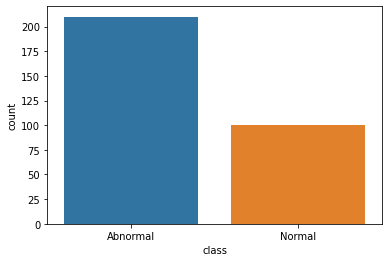

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    object 
dtypes: float64(6), object(1)
memory usage: 17.1+ KB
None


In [31]:
# 2. VERİNİN (.CSV) İÇE YÜKLEMESİ ve PD DATAFRAME OLUŞTURMA (comma seperated value virgulle ayrılan veriler ) [2.3]-[2.4]

veriler = pd.read_csv("20220501_Bootcamp 2022_Sınıflandırma_ortopedik_hastaların_biyomekanik_özellikleri_veriler.csv")
print(veriler.head)

# 2a. ON İŞLEME - Dataframe içindeki sutunların explotary kategorik veri incelemei ornegi :
sbn.countplot(veriler["class"]) # Boolean ikili kategorik verileri grafikte görelim
plt.show()                      # Kategorik verilerin değer ve miktarları grafikte görelim.

print(veriler.info())           # Ön İşleme için kontrol edelim.
 #   Column                    Non-Null Count  Dtype  

 # 0   pelvic_incidence          310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 1   pelvic_tilt numeric       310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 2   lumbar_lordosis_angle     310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 3   sacral_slope              310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 4   pelvic_radius             310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 5   degree_spondylolisthesis  310 non-null    float64   Sayısal veri ve Eksik veri yok. 
 # 6   class                     310 non-null    object    KATOGORİK VERİ veri ve Eksik veri yok. ÖN İŞLEME yapılacak


In [32]:
# 2d. ON İŞLEME - Katogorik Verilerle Çalışma [2.6] ulke katogorik verileri (normal ve abnormal)
# Burada LE VE OHE yerine farklı değişim yapılmıştır. If clause ile yaptık.

veriler["class"] = [1 if each == "Abnormal"                # class sütünü 1 dir eğer herbiri abnormal ise,
                    else 0 for each in veriler["class"] ]  # yada 0 dir veriler class sutunu herbiri için.
veriler.head(), veriler.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 310 entries, 0 to 309
Data columns (total 7 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   pelvic_incidence          310 non-null    float64
 1   pelvic_tilt numeric       310 non-null    float64
 2   lumbar_lordosis_angle     310 non-null    float64
 3   sacral_slope              310 non-null    float64
 4   pelvic_radius             310 non-null    float64
 5   degree_spondylolisthesis  310 non-null    float64
 6   class                     310 non-null    int64  
dtypes: float64(6), int64(1)
memory usage: 17.1 KB


(   pelvic_incidence  pelvic_tilt numeric  lumbar_lordosis_angle  sacral_slope  \
 0         63.027818            22.552586              39.609117     40.475232   
 1         39.056951            10.060991              25.015378     28.995960   
 2         68.832021            22.218482              50.092194     46.613539   
 3         69.297008            24.652878              44.311238     44.644130   
 4         49.712859             9.652075              28.317406     40.060784   
 
    pelvic_radius  degree_spondylolisthesis  class  
 0      98.672917                 -0.254400      1  
 1     114.405425                  4.564259      1  
 2     105.985135                 -3.530317      1  
 3     101.868495                 11.211523      1  
 4     108.168725                  7.918501      1  ,
 None)

In [33]:
# 3. BAĞIMSIZ (X) VE BAĞIMLI (Y) DEĞİŞKENLERİN TEST VE TRAIN OLARAK BÖLÜNMESİ [2.8]

# 3a. BAĞIMSIZ VE BAĞIMLI DEĞİŞKENLERİN BELİRLENMESİ **************************************************

x = veriler.iloc[:,1:6].values # bağımsız değişkenler
# 1.pelvic_incidence, 2.pelvic_tilt numeric, 3.lumbar_lordosis_angle 4. sacral_slope 5.pelvic_radius 6. degree_spondylolisthesis
y = veriler.iloc[:,-1:].values # bağımlı tahmin edilecek değişken
# 6. class değişkenleri 
x,y


(array([[ 22.55258597,  39.60911701,  40.47523153,  98.67291675,
          -0.25439999],
        [ 10.06099147,  25.01537822,  28.99595951, 114.4054254 ,
           4.56425864],
        [ 22.21848205,  50.09219357,  46.61353893, 105.9851355 ,
          -3.53031731],
        ...,
        [ 22.6949683 ,  46.17034732,  38.75162833, 125.6707246 ,
          -2.70787952],
        [  8.69315736,  41.5831264 ,  36.55963472, 118.5458418 ,
           0.21475017],
        [  5.07399141,  36.64123294,  28.76764934, 123.9452436 ,
          -0.19924909]]),
 array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [

In [34]:
# 3. BAĞIMSIZ (X) VE BAĞIMLI (Y) DEĞİŞKENLERİN TEST VE TRAIN OLARAK BÖLÜNMESİ [2.8]

# 3a. BAĞIMSIZ VE BAĞIMLI DEĞİŞKENLERİN BELİRLENMESİ **************************************************

x = veriler.iloc[:,1:6].values # bağımsız değişkenler
# 1.pelvic_incidence, 2.pelvic_tilt numeric, 3.lumbar_lordosis_angle 4. sacral_slope 5.pelvic_radius 6. degree_spondylolisthesis
y = veriler.iloc[:,-1:].values # bağımlı tahmin edilecek değişken
# 6. class değişkenleri 
x,y

# 3b. DEĞİŞKENLERİN TEST VE TRAIN EDİLMESİ***************************************************************

# test_size=0.33 verilerin 33% test olaağı anlamına geliyor.

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=0)

print(x_train)
print(y_train)
print(x_test)
print(y_test)

# 4. VERİLERİN ÖZNİTELİK ÖLÇEKLENMESİ [2.9] [3.4]

from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test) # Burada fit yani öğrenme iptal edildi. sadece x testten kullan transform ile +++Anlamadım ama?? 

print(X_train), print(X_test)

# index numaralarına dikkat: rastgele alınmış satırlar

[[  7.82622134  24.28481815  23.657997   113.8331446    4.3930805 ]
 [ 13.46998624  61.19999999  56.92932218 102.3375244   25.53842852]
 [ 36.04301632  69.22104479  50.71059314 139.414504   110.8607824 ]
 ...
 [ 38.75066978  47.87140494  47.29061004 122.0929536   61.98827709]
 [ 16.57736351  30.70619135  24.77514057 113.2666746   -4.49795756]
 [ 13.45820343  43.76970978  43.21008939  93.69220863  21.10812135]]
[[1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 

(None, None)

In [35]:
# 5. LOJISTIK REGRESYON VE VİZUALİZATION [GÖRSELLEŞTİRME] :
#------------------------------------------------------------------------------------------------------------------
# Önemli Bilgiler :
# 1. Burada Log&Reg Regresyonla karıştırılmamalıdır. Sınıflandırma için kullanılır.SupportVektorM ile en cok kullanılan sınıflandırma algoritmasıdır.


from sklearn.linear_model import LogisticRegression
# sklearn kutuphanesinden Lojsitk Regresyon işlemler yapabiliyoruz.

logr = LogisticRegression(random_state=0)
logr.fit(X_train,y_train)


y_pred = logr.predict(X_test)
print(y_pred)
print(y_test)

# TAM TERSİNİ TAHMİN ETTİ


[0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]]


C:\Users\Lenovo\anaconda3\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


KARMAŞIKLIK MATRISI CONFUSION MATRIX

In [37]:
# 10. CONFUSION MATRIX (KARMAŞIKLIK MATRISI) :

#  G                TAHMİN PREDICTION
#  E -----------------------------------------------
#  R   True-Positive  (TP)   +   False-Negative (FN)
#  Ç   +++++++++++++++++++++++++++++++++++++++++++++
#  E   False-Positive (FP)   +   True-Negative  (TN)
#  K

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred) # y_test gerçek ve y_pred tahmini cinsiyet karşılaştrması

# Matris değerlerinin incelenmesi:
Satır0 = cm[0] # TP+FN
TP = Satır0[0]
FN = Satır0[1]
Satır1 = cm[1] # FP+TN
FP = Satır1[0]
TN = Satır1[1]


print(cm)
print (y_test,y_pred) # imojiler 😋⁜⨌ WİN+.

print("Accuracy Rate    [Doğruluk Oranı]= ","%", ((TP+TN)/(TP+FN+FP+TN))*100)
print("Error Rate       [Hata Oranı]=     ","%", ((100-((TP+TN)/(TP+FN+FP+TN))*100)))
print("Precision Rate   [Kesinlik Oranı]= ","%", ((TP)/(TP+FP))*100)
print("Specificity-True/Neg rate (TNR)=   ","%", ((TN/(FP+TN))*100))
print("Sensitivity-Recall Rate -True/Pos Rate [Hassasiyet Oranı]=","%",((TP)/(TP+FN))*100)
# Burada en önemli nokta tahmin edilen bağımlı değişkeninin balanced olması gerkiyor. Yani %90 Erkek ve
# 10% kadın olan veri setinde Accuracy Rate in 90% olması başarı değildir. Kadını bulamama ihtimallerine
# rağmen 90% erkek bulacağı için Accuracy Rate hata yaptırır. Bundan dolayı diğer değerlerede bakılmalıdır.


[[29  8]
 [10 56]]
[[0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]] [0 1 1 1 1 0 1 1 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 1 1 1 0 1 1 1 1
 1 1 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 0 0 1 0 1 1 1 1 1 0 1 0 1
 0 1 1 0 0 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 0 1 0 0]
Accuracy Rate    [Doğruluk Oranı]=  % 82.52427184466019
Error Rate       [Hata Oranı]=      % 17.47572815533981
Precision Rate   [Kesinlik Oranı]=  % 74.35897435897436
Specificity-True/Neg rate (TNR)=    % 84.84848484848484
Sensitivity-Recall Rate -True/P